# Pregunta 3:
### ¿Cuáles son los departamentos donde más casos de violencia intrafamiliar se han reportado? ¿Cuáles son los departamentos donde más casos de divorcios se han reportado? ¿Estos están relacionados?  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend 
import random
from scipy import stats
import seaborn as sns
from scipy.stats import chi2_contingency



In [2]:
df = pd.read_csv('./files/Dataset_Unificado_Proyecto.csv', sep=';', low_memory=False)

In [3]:
#Indicador para divorcios y violecia
df['EVENTO_REAL'] = df.apply(
    lambda row: 'Violencia' if pd.notna(row['VIC_EDAD']) 
    else 'Divorcio',
    axis=1
)
df['EVENTO_REAL'].value_counts()

EVENTO_REAL
Violencia    326105
Divorcio      63694
Name: count, dtype: int64

In [4]:
#Eliminar deptos con valores numéricos
df['DEPTO'].unique()
df['DEPTO'] = df['DEPTO'].astype(str).str.strip()
df = df[~df['DEPTO'].str.match(r'^\d+(\.0)?$')]
df['DEPTO'] = df['DEPTO'].str.title()

df['DEPTO'].value_counts().head(20)


DEPTO
Guatemala         30083
Quetzaltenango     6363
Cob�N              4142
Jutiapa            4116
San Marcos         4090
Retalhuleu         3990
Escuintla          3905
Villa Nueva        3719
Mixco              3715
Chimaltenango      3494
Jalapa             3440
Huehuetenango      3037
Mazatenango        2532
Zacapa             2464
Chiquimula         2360
Suchitepéquez      2214
Izabal             2012
Santa Rosa         1888
Chinautla          1790
Quiché             1759
Name: count, dtype: int64

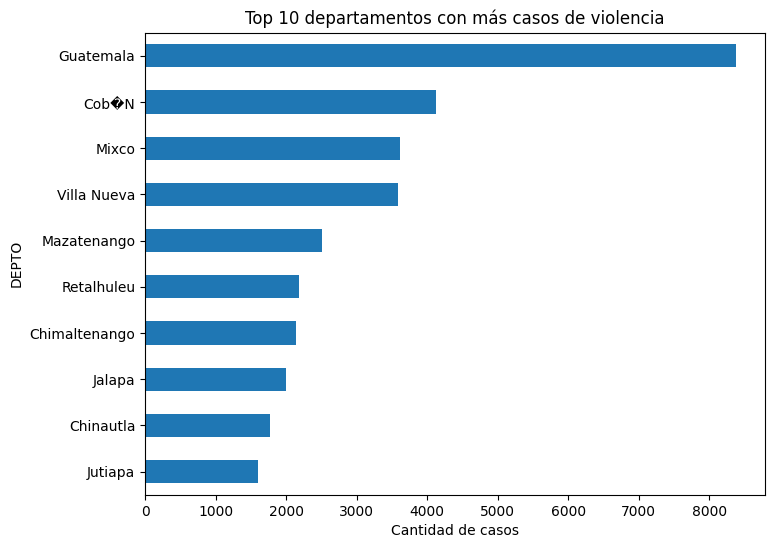

In [5]:
#Deptos con mas violencia
violencia_depto = (
    df[df['EVENTO_REAL']=='Violencia']
    .groupby('DEPTO')
    .size()
    .sort_values(ascending=False)
)

violencia_depto

#Gráfico
plt.figure(figsize=(8,6))
violencia_depto.head(10).sort_values().plot(kind='barh')
plt.title("Top 10 departamentos con más casos de violencia")
plt.xlabel("Cantidad de casos")
plt.show()

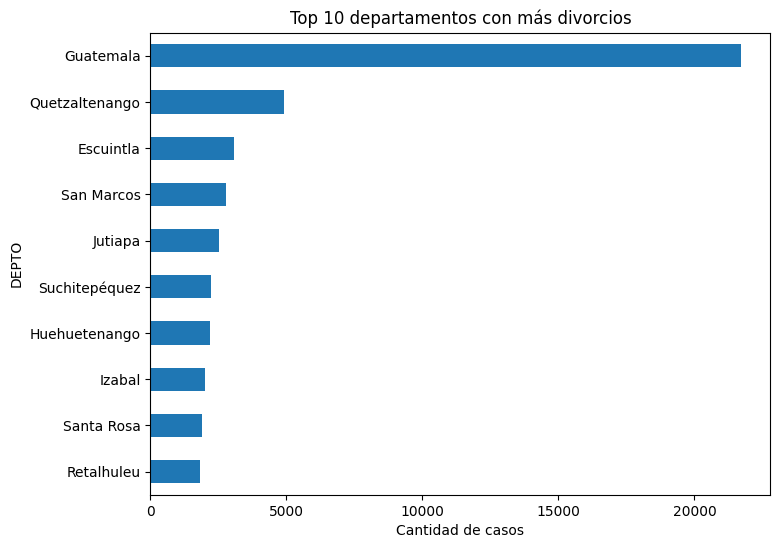

In [6]:
#Deptos con mas divorcios
divorcio_depto = (
    df[df['EVENTO_REAL']=='Divorcio']
    .groupby('DEPTO')
    .size()
    .sort_values(ascending=False)
)

divorcio_depto.head(10)

plt.figure(figsize=(8,6))
divorcio_depto.head(10).sort_values().plot(kind='barh')
plt.title("Top 10 departamentos con más divorcios")
plt.xlabel("Cantidad de casos")
plt.show()



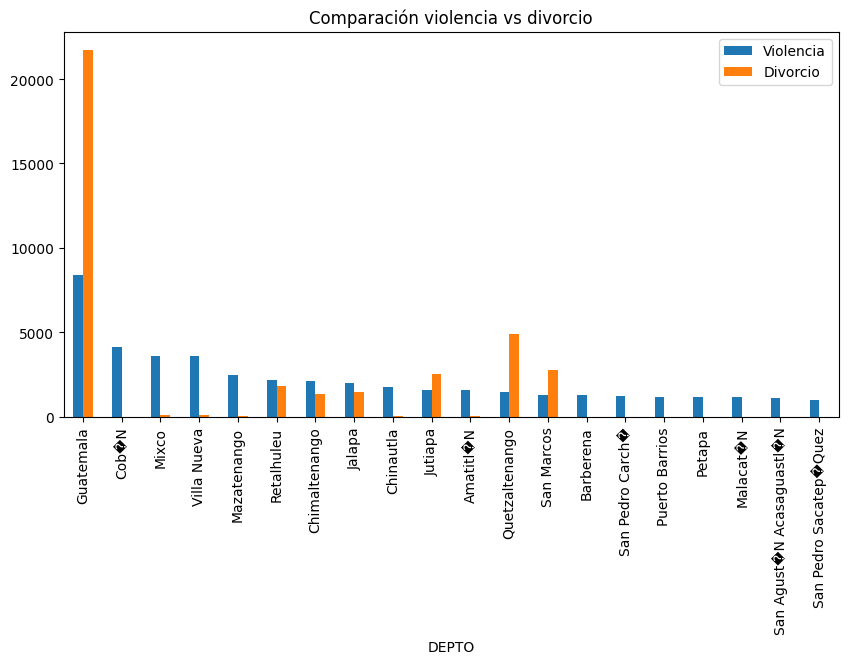

In [7]:
#Relación
tabla_depto = (
    df.groupby(['DEPTO','EVENTO_REAL'])
      .size()
      .unstack(fill_value=0)
)

correlacion_depto = tabla_depto['Violencia'].corr(tabla_depto['Divorcio'])
correlacion_depto

top10 = violencia_depto.head(20).index

comparacion = pd.DataFrame({
    'Violencia': violencia_depto[top10],
    'Divorcio': divorcio_depto.reindex(top10).fillna(0)
})

comparacion.plot(kind='bar', figsize=(10,5))
plt.title("Comparación violencia vs divorcio")
plt.show()


